# Decission Tree

In [61]:
%pip install networkx
%pip install matplotlib
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [62]:
%matplotlib ipympl

In [63]:
from HardenedSteel.objects import CounterObject
from networkx import Graph, draw, grid_graph
from matplotlib import pyplot as Plot

In [64]:
leaf_counter = CounterObject()
branch_counter = CounterObject()


In [65]:
def next_leaf() -> int:
    global leaf_counter
    id = int(leaf_counter)
    leaf_counter.increment()

    return id

def next_branch() -> int:
    global branch_counter
    id = int(branch_counter)
    branch_counter.increment()
    return id

In [66]:
class BranchLeaf:
    def __init__(self) -> None:
        self.index: int = next_leaf()

        # Body
        self.value: float = 0.0
        self.weight: float = 0.0

        self.neighbors: list = list()

        # Flow
        self.inputs: list = list()
        self.outputs: list = list()

        self.is_activated: bool = False

    def __del__(self) -> None:
        del                     \
            self.value,         \
            self.weight,        \
            self.inputs,        \
            self.outputs,       \
            self.index,         \
            self.is_activated,  \
            self.neighbors
    
    def get_inputs(self) -> list:
        return self.inputs
    
    def get_outputs(self) -> list:
        return self.outputs
    
    def set_inputs(
        self, 
        value: list
    ) -> None:
        self.inputs = value
    
    def set_outputs(
        self, 
        value: list
    ) -> None:
        self.outputs = value
    
    def append_to_inputs(
        self, 
        leaf
    ) -> None:
        if isinstance(leaf, BranchLeaf):
            self.get_inputs().append(leaf)
    
    def append_to_outputs(
        self, 
        leaf
    ) -> None:
        if isinstance(leaf, BranchLeaf):
            self.get_outputs().append(leaf)
    
    def append_to_neighbors(
        self, 
        leaf
    ) -> None:
        if isinstance(leaf, BranchLeaf): 
            self.get_neighbors().append(
                leaf
            )

    def get_neighbors(self) -> list:
        return self.neighbors
    
    def set_neighbors(
        self, 
        value
    ) -> None:
        self.neighbors = value

    def get_is_activated(self) -> bool:
        return self.is_activated

    def set_is_activated(
            self, 
            value: bool
        ) -> None:
        self.is_activated = value


    def __str__(self) -> str:
        return str(self.index)
    
    def __int__(self) -> int:
        return self.index
    
    def __bool__(self) -> bool:
        return self.get_is_activated()
    

In [67]:
class Branch:
    def __init__(self) -> None:
        self.index: int = next_branch()
        self.leafs: list = list()
        self.is_to_connect_neighbors: bool = False

    def __del__(self) -> None:
        del self.leafs, self.index, self.is_to_connect_neighbors

    def build(self) -> None:
        if self.is_to_connect_neighbors:
            self.connect_neighbors()

    def connect_with_branch_output(
        self,
        other_branch
    ) -> None:
        if isinstance(
            other_branch, 
            Branch
        ):
            # Connect input with other branchs output
            for index in range(len(self.leafs)):
                current_leaf_in_this_branch: BranchLeaf = self.get_leafs()[index]
                for leaf in other_branch.get_leafs():
                    current_leaf_in_this_branch.get_inputs().append(leaf)

            # Connect other branchs output with this branch input
            for index in range(len(other_branch.get_leafs())):
                selected_leaf_in_other: BranchLeaf = other_branch.get_leafs()[index]

                for leaf in self.get_leafs():
                    selected_leaf_in_other.get_outputs().append(leaf)

    def connect_with_branch_input(
        self,
        branch
    ) -> None:
        if isinstance(branch, Branch):
            pass

    def connect_neighbors(self) -> None:
        for leaf in self.get_leafs():
            selected: BranchLeaf = leaf

            for others in self.get_leafs():
                if not selected.index == others.index:
                    selected.get_neighbors().append(others)

    def add_leaf(self) -> None:
        self.leafs.append(
            BranchLeaf()
        )
    
    def get_leaf_at(
        self, 
        index:int
    ) -> BranchLeaf | None:
        last_index: int = len(
            self.get_leafs()
        )

        if not(
            last_index == 0
        ):
            return self.leafs[index]
        
        return None

    def get_last_leaf(self) -> BranchLeaf | None:
        last_index: int = len(self.get_leafs())

        if not(
            last_index == 0
        ):
            return self.leafs[last_index]

        return None
    
    def get_leafs(self) -> list:
        if self.is_leafs_none():
            self.set_leafs(
                list()
            )

        return self.leafs
    
    def set_leafs(
        self, 
        value: list
    ) -> None:
        self.leafs = value

    def is_leafs_none(self) -> bool:
        return self.leafs is None
    
    def __str__(self) -> str:
        return str(self.index)
    

In [68]:
class DecisionGraph:
    def __init__(self) -> None:
        self.title: str | None = None
        self.branches: list = list()
    
    def __del__(self) -> None:
        del self.branches

    def get_last_branch(self) -> Branch | None:
        last_index: int = len(
            self.get_branches()
        )

        if not(last_index == 0):
            return self.get_branches()[last_index]

        return None

    def get_branch_at(
        self, 
        index:int
    ) -> Branch | None:
        last_index: int = len(
            self.get_branches()
        )

        if not(last_index == 0):
            return self.get_branches()[index]

        return None

    def add_branch(self) -> None:
        self.get_branches().append(
            Branch()
        )

    def delete_branch(
        self, 
        index: int
    ) -> None:
        self.get_branches().pop(
            index
        )

    def get_branches(self) -> list:
        return self.branches

    def set_branches(
            self, 
            value: list
        ) -> None:
        self.branches = value

    def get_maximum_size_of_leafs(self) -> int | None:
        size: int | None = None

        for branch in self.get_branches():
            selected_branch: Branch = branch

            size_of_leafs: int = len(
                selected_branch.get_leafs()
            )

            if size is None:
                size = size_of_leafs
            else:
                if size_of_leafs > size:
                    size = size_of_leafs

        return size

    def connect_as_stream(self) -> None:
        size: int = len(self.branches)

        for current_index in range(1, size):
            previous_index: int = (current_index - 1)

            previous_branch: Branch = self.branches[previous_index]
            current_branch: Branch = self.branches[current_index]

            current_branch.connect_with_branch_output(previous_branch)

    def build_neighbors(self) -> None:
        for branch in self.get_branches():
            branch.build()

    def iterate_leafs(self) -> list():
        result = list()

        for branch in self.get_branches():
            selected: Branch = branch

            for leaf in selected.get_leafs():
                result.append(leaf)

        return result

    def __str__(self) -> str:
        return human_readable_tree_structure(self)

# Functions for the Decision Tree
def human_readable_tree_structure(
    tree: DecisionGraph
) -> str:
    result_str: str = ''
    title: str | None = None

    if tree.title is None:
        title = 'graph'
    else:
        title = tree.title
    result_str = result_str + 'title: ' + title
    return result_str


In [69]:
tree = DecisionGraph()

number_of_branches: int = 6
number_of_leafs: int = 4

for i in range(number_of_branches):
    tree.add_branch()

for branch in tree.get_branches():
    selected: Branch = branch

    for i in range(number_of_leafs):
        selected.add_leaf()

tree.connect_as_stream()
tree.build_neighbors()

In [70]:
def generate_decision_graph(
    tree: DecisionGraph
) -> Graph:
    graph = Graph()
    # Generates all the leafs in the graph
    for branch in tree.get_branches():
        selected_branch: Branch = branch

        for leaf in selected_branch.get_leafs():
            graph.add_node(int(leaf))
    
    graph = generate_edges(
        graph, 
        tree
    )

    return graph

def generate_edges(
    graph: Graph, 
    tree: DecisionGraph
) -> Graph:
    
    for leaf in tree.iterate_leafs():
        selected_leaf: BranchLeaf = leaf
        
        for output_leaf in selected_leaf.get_outputs():
            graph.add_edge(
                selected_leaf.index, 
                output_leaf.index
            )
            
        for input_leaf in selected_leaf.get_inputs():
            graph.add_edge(
                input_leaf.index, 
                selected_leaf.index
            )
        
        for neighbor in selected_leaf.get_neighbors():
            graph.add_edge(int(neighbor.index), int(selected_leaf.index))
    
    return graph

In [71]:
def find_in_tree(
    tree: DecisionGraph, 
    index_of_leaf: int
) -> BranchLeaf | None:
    leafs: list = tree.iterate_leafs()

    for leaf in leafs:
        if leaf.index == index_of_leaf:
            return leaf

    return None

In [72]:
def generate_color_map(
    graph: Graph, 
    use_default: bool = False
) -> list:
    global tree
    result = list()

    for node in graph:
        if use_default:
            result.append('orange')
        else:
            leaf = find_in_tree(
                tree, 
                int(node)
            )

            if leaf is None:
                result.append('orange')
            else:
                if bool(leaf):
                    result.append('green')
                else:
                    result.append('red')

    return result

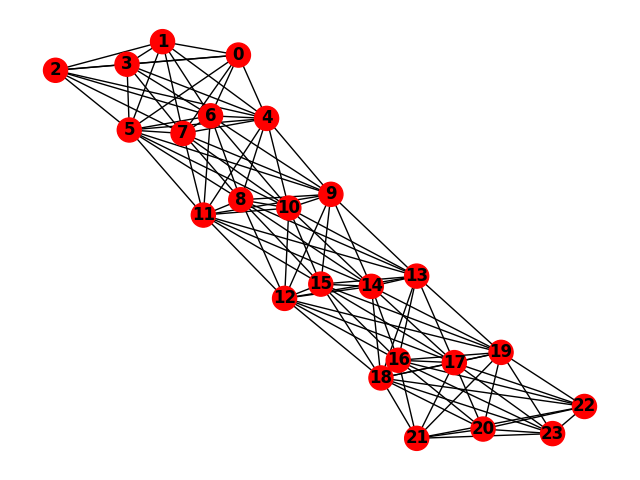

In [76]:
Plot.clf()

grid = generate_decision_graph(tree)

draw(
    grid, 
    with_labels=True,
    node_color=generate_color_map(grid),
    font_weight='bold'
)

Plot.show()